# Example: Business Sales Data Analysis with Time Series

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
# Step 1: Create a synthetic business sales dataset
np.random.seed(42)  # For reproducibility
date_rng = pd.date_range(start='2020-01-01', end='2023-12-31', freq='ME')
sales = np.random.randint(10000, 50000, size=(len(date_rng))) + np.linspace(0, 20000, len(date_rng)) + np.random.normal(0, 5000, size=len(date_rng))

In [9]:
# Create a DataFrame
sales_data = pd.DataFrame(data={'date': date_rng, 'sales': sales})

In [11]:
sales_data.head()

,date,sales
0,2020-01-31,19469.404430
1,2020-02-29,16745.493237
2,2020-03-31,62900.629038
3,2020-04-30,28528.794366
4,2020-05-31,19060.319240


In [13]:
# Step 2: Set 'date' as the index
sales_data.set_index('date', inplace=True)

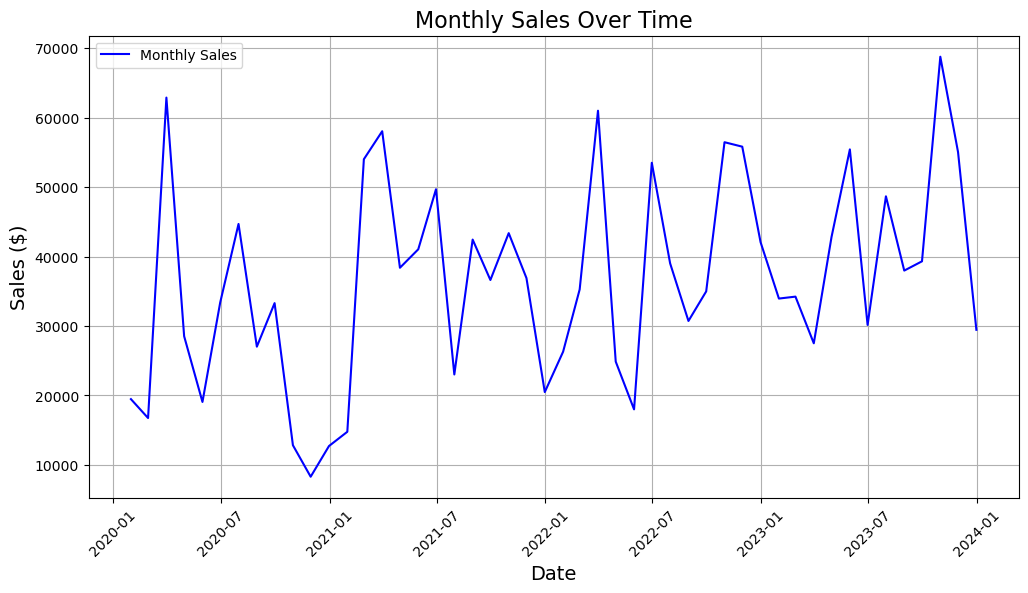

In [15]:
# Step 3: Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['sales'], label='Monthly Sales', color='blue')
plt.title('Monthly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [17]:
# Step 4: Conduct a seasonal decomposition
decomposition = seasonal_decompose(sales_data['sales'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

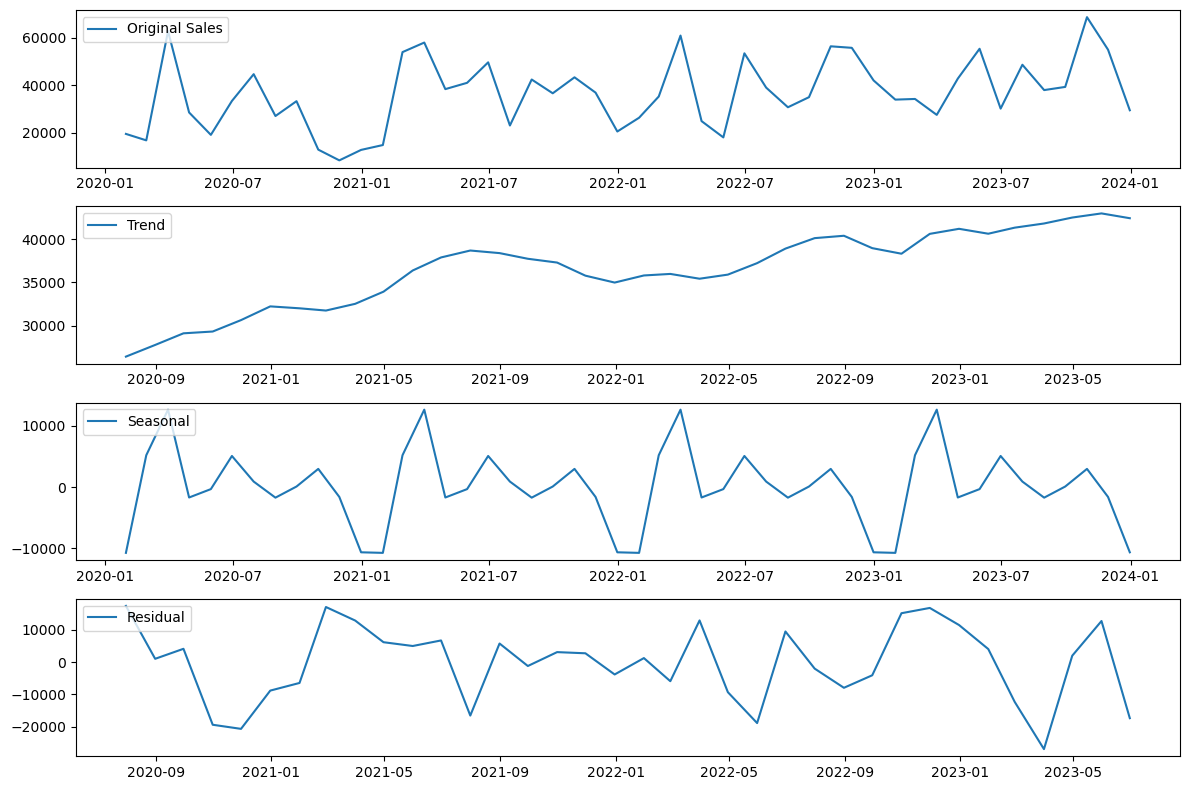

In [19]:
# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sales_data['sales'], label='Original Sales')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
# Step 5: Calculate rolling average
sales_data['rolling_avg'] = sales_data['sales'].rolling(window=6).mean()

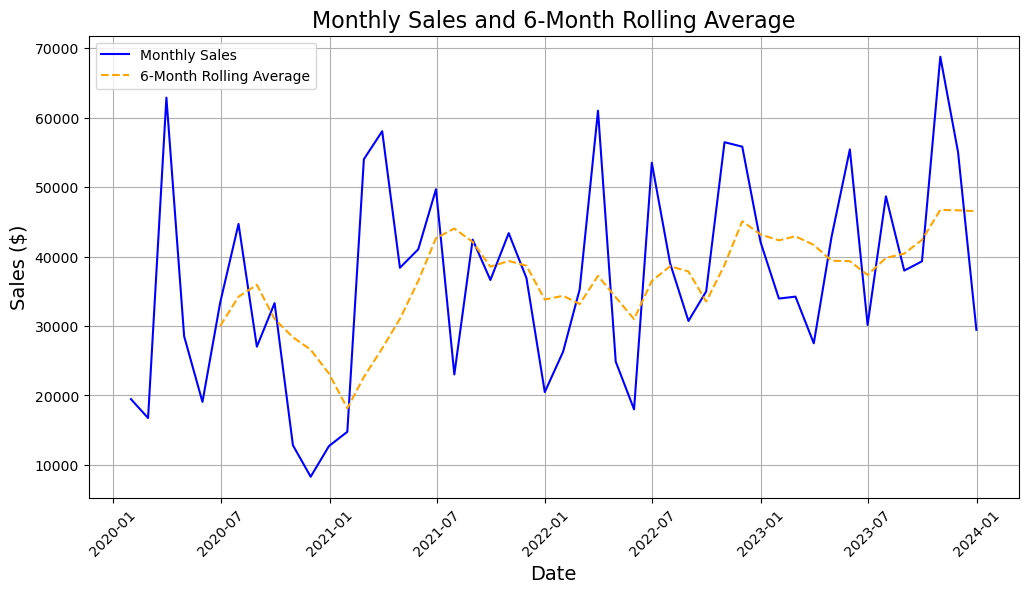

In [23]:
# Step 6: Plot sales with rolling average
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['sales'], label='Monthly Sales', color='blue')
plt.plot(sales_data.index, sales_data['rolling_avg'], label='6-Month Rolling Average', color='orange', linestyle='--')
plt.title('Monthly Sales and 6-Month Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()